In [1]:
# %run "Scripts/dataprep.py"
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('Scripts')

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, utils, models
from torch.utils.data import Dataset, DataLoader

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from utils import *
from SSVEPDataset import SSVEPDataset
from classes import *
from SSVEPDataloader import *

from sklearn import preprocessing
import os
import time
import copy
from functools import partial

def read_data(dataframe):
    return torch.tensor(pd.read_csv(dataframe['path'], names = range(1, 16+1), dtype = float).values)

def dataVisualization(X):
    X = X.squeeze().T
    
    fig = plt.figure(figsize = (15, 15))
    ax = fig.add_subplot()
    ax.imshow(X, cmap = 'gray')

In [3]:
dataType = '512'
data = pd.read_csv('SSVEPDataset_'+dataType+'.csv')
dataset = SSVEPDataset(data)

batchSize = 16
dataloaders, datasetsSizes = SSVEPDataloaders(dataset, batchSize)
# example = next(iter(dataloaders['train']))['series']

device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")
# device = 'cpu'

In [32]:
exemplo = iter(dataloaders['train']).next()['series']

In [39]:
transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize(mean=[0],
                                     std=[1])
            ])

In [51]:
temp = exemplo[0].squeeze().numpy()
print(temp)
temp = preprocessing.normalize(temp, axis = 0)
print(temp)

[[-6.818296e-06 -1.062118e-05  1.715923e-05 ...  1.012539e-05
   7.513396e-06  1.192666e-05]
 [-2.553090e-06 -3.151899e-06  1.845703e-05 ...  7.557974e-06
   4.130769e-06  8.793182e-06]
 [ 3.023112e-06  2.285022e-06  1.373611e-05 ...  3.570052e-06
   3.797359e-06  5.191748e-06]
 ...
 [ 1.454958e-07 -8.599689e-06  2.569384e-06 ...  2.745817e-07
  -3.079348e-06  1.112557e-06]
 [-2.083038e-06 -8.903886e-06  5.275793e-06 ... -5.962302e-07
  -4.263009e-06  4.682228e-07]
 [-3.578899e-06 -7.435193e-06  1.246767e-05 ... -2.661810e-06
  -7.347203e-06  1.684010e-06]]
[[-0.06182189 -0.08151051  0.086925   ...  0.0807268   0.05155364
   0.1317798 ]
 [-0.02314902 -0.02418873  0.09349938 ...  0.06025754  0.02834353
   0.09715744]
 [ 0.02741073  0.01753603  0.06958421 ...  0.02846299  0.02605582
   0.05736455]
 ...
 [ 0.00131922 -0.0659969   0.01301595 ...  0.00218916 -0.02112914
   0.01229284]
 [-0.01888703 -0.06833141  0.02672604 ... -0.00475357 -0.02925091
   0.00517348]
 [-0.03245009 -0.05706017 

In [2]:
preprocessing.normalize?

Signature: preprocessing.normalize(X, norm='l2', axis=1, copy=True, return_norm=False)
Docstring:
Scale input vectors individually to unit norm (vector length).

Read more in the :ref:`User Guide <preprocessing_normalization>`.

Parameters
----------
X : {array-like, sparse matrix}, shape [n_samples, n_features]
    The data to normalize, element by element.
    scipy.sparse matrices should be in CSR format to avoid an
    un-necessary copy.

norm : 'l1', 'l2', or 'max', optional ('l2' by default)
    The norm to use to normalize each non zero sample (or each non-zero
    feature if axis is 0).

axis : 0 or 1, optional (1 by default)
    axis used to normalize the data along. If 1, independently normalize
    each sample, otherwise (if 0) normalize each feature.

copy : boolean, optional, default True
    set to False to perform inplace row normalization and avoid a
    copy (if the input is already a numpy array or a scipy.sparse
    CSR matrix and if axis is 1).

return_norm : boolea

(array([ 13.,  21.,  54., 105., 138., 105.,  41.,  28.,   4.,   3.]),
 array([-0.11788762, -0.09109719, -0.06430675, -0.03751631, -0.01072588,
         0.01606456,  0.042855  ,  0.06964543,  0.09643587,  0.12322631,
         0.15001674]),
 <a list of 10 Patch objects>)

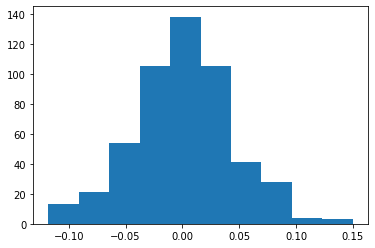

In [52]:
fig, ax = plt.subplots()
ax.hist(temp.T[0], bins = 10)

(array([1., 3., 1., 1., 2., 3., 3., 1., 0., 1.]),
 array([-1.2303220e-05, -9.5964950e-06, -6.8897700e-06, -4.1830450e-06,
        -1.4763200e-06,  1.2304050e-06,  3.9371300e-06,  6.6438550e-06,
         9.3505800e-06,  1.2057305e-05,  1.4764030e-05]),
 <a list of 10 Patch objects>)

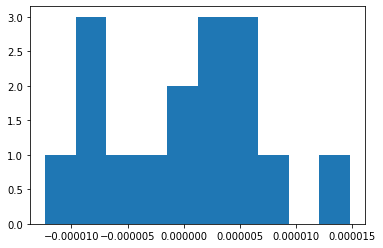

In [20]:
fig, ax = plt.subplots()
ax.hist(exemplo[0][0][1], bins = 10)

***

In [3]:
path = 'C:\\Users\\Patrick\\Documents\\GitHub\\ICDeepLearning\\Data\\Backup\\Originais\\512'
subjects = os.listdir(path)

In [38]:
from copy import deepcopy
for subject in subjects:
    for state in [1, 2, 3, 4, 5]:
        full_data = pd.DataFrame(columns = range(16))
        new_path = path+'\\'+subject+'\\'+str(state)
        files = os.listdir(new_path)
        for file in files:
            data = pd.read_csv(new_path+'\\'+file, sep = ' ', header = None).loc[:, 0:15]
            full_data = pd.concat([full_data, data])
        
        full_data.to_csv(new_path+'\\full.csv', index = False)